# DISCLAIMER: CODE IS 

In [1]:
from sandbox import *

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,precision_recall_curve, auc, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

# DATA

In [2]:
# #Read in data
df = pd.read_csv('exercise_data/C_elegans_acc_seq.csv', header=None, names =['label', 'seq'])
y = df.label
X = df.seq

random_state = 42
k = 5  # crossvalidation split


# We take 30% of the C elegans dataset for testing. The other 70% are split 80/20 into traininga nd validation
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = random_state)

print("xtrain:", x_train.shape)
print("X seq:", X.shape)

# then we one-hot encode it
x_prep, y_prep = prep_data_cnn(x_train, y_train)
x_prep_test, y_prep_test = prep_data_cnn(x_test, y_test)

print(x_prep.shape)
print(y_prep.shape)
print((np.asarray(x_prep)).shape)

xtrain: (1540,)
X seq: (2200,)
(1540, 82, 4)
(1540,)
(1540, 82, 4)


In [3]:
# Settings is a list of lists containing our evaluation settings.
# We optimize modeltype, batch_size and learning_rate.


def get_settings():
    settings = []
    for m in ['cnn', 'cnn2', 'rnn']:
        for l in [0.1, 0.01, 0.001]:
            for b in [8, 64]:
                settings.append([m, l, b])
    return settings

In [4]:
# We generate a learning setting list

settings = get_settings()
print(settings)

[['cnn', 0.1, 8], ['cnn', 0.1, 64], ['cnn', 0.01, 8], ['cnn', 0.01, 64], ['cnn', 0.001, 8], ['cnn', 0.001, 64], ['cnn2', 0.1, 8], ['cnn2', 0.1, 64], ['cnn2', 0.01, 8], ['cnn2', 0.01, 64], ['cnn2', 0.001, 8], ['cnn2', 0.001, 64], ['rnn', 0.1, 8], ['rnn', 0.1, 64], ['rnn', 0.01, 8], ['rnn', 0.01, 64], ['rnn', 0.001, 8], ['rnn', 0.001, 64]]


In [5]:
cv = cross_validation(x_prep, y_prep, settings,  x_test=x_prep_test, y_test=y_prep_test, k=k, epochs=30, test_hidden=False)

(1540,)
weights for classes: {0: 0.5523672883787661, 1: 5.273972602739725}
Epoch 1/30
154/154 [==============================] - 0s 3ms/step - loss: 14.5037 - accuracy: 0.4756 - val_loss: 4.2285 - val_accuracy: 0.0812
Epoch 2/30
154/154 [==============================] - 0s 2ms/step - loss: 3.5926 - accuracy: 0.3856 - val_loss: 3.0319 - val_accuracy: 0.9188
Epoch 3/30
154/154 [==============================] - 0s 2ms/step - loss: 2.6837 - accuracy: 0.4667 - val_loss: 2.4673 - val_accuracy: 0.0812
Epoch 4/30
154/154 [==============================] - 0s 2ms/step - loss: 2.1228 - accuracy: 0.5300 - val_loss: 1.8517 - val_accuracy: 0.9188
Epoch 5/30
154/154 [==============================] - 0s 2ms/step - loss: 1.7725 - accuracy: 0.5674 - val_loss: 1.6202 - val_accuracy: 0.0812
Epoch 6/30
154/154 [==============================] - 0s 2ms/step - loss: 1.5426 - accuracy: 0.3774 - val_loss: 1.4674 - val_accuracy: 0.0812
Epoch 7/30
154/154 [==============================] - 0s 2ms/step - loss

Epoch 28/30
154/154 [==============================] - 0s 2ms/step - loss: 3.4504 - accuracy: 0.4562 - val_loss: 3.2984 - val_accuracy: 0.8896
Epoch 29/30
154/154 [==============================] - 0s 2ms/step - loss: 3.3135 - accuracy: 0.5227 - val_loss: 3.1584 - val_accuracy: 0.8896
Epoch 30/30
154/154 [==============================] - 0s 2ms/step - loss: 3.1828 - accuracy: 0.4643 - val_loss: 3.0293 - val_accuracy: 0.8896
Epoch 1/30
154/154 [==============================] - 0s 3ms/step - loss: 281.3355 - accuracy: 0.5292 - val_loss: 6.5736 - val_accuracy: 0.1201
Epoch 2/30
154/154 [==============================] - 0s 2ms/step - loss: 5.7674 - accuracy: 0.5146 - val_loss: 5.0644 - val_accuracy: 0.8799
Epoch 3/30
154/154 [==============================] - 0s 2ms/step - loss: 4.8577 - accuracy: 0.6404 - val_loss: 4.4665 - val_accuracy: 0.8799
Epoch 4/30
154/154 [==============================] - 0s 2ms/step - loss: 4.2671 - accuracy: 0.5901 - val_loss: 4.1538 - val_accuracy: 0.1201
E

154/154 [==============================] - 0s 2ms/step - loss: 0.8373 - accuracy: 0.4196 - val_loss: 0.7905 - val_accuracy: 0.9123
Epoch 26/30
154/154 [==============================] - 0s 2ms/step - loss: 0.8205 - accuracy: 0.5511 - val_loss: 1.1453 - val_accuracy: 0.0877
Epoch 27/30
154/154 [==============================] - 0s 2ms/step - loss: 0.8080 - accuracy: 0.4115 - val_loss: 0.8976 - val_accuracy: 0.0877
Epoch 28/30
154/154 [==============================] - 0s 2ms/step - loss: 0.8010 - accuracy: 0.4894 - val_loss: 0.8440 - val_accuracy: 0.0877
Epoch 29/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7826 - accuracy: 0.4651 - val_loss: 0.7175 - val_accuracy: 0.9123
Epoch 30/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7761 - accuracy: 0.4067 - val_loss: 0.8458 - val_accuracy: 0.0877
Epoch 1/30
154/154 [==============================] - 0s 3ms/step - loss: 428.9712 - accuracy: 0.4269 - val_loss: 10.6624 - val_accuracy: 0.0747
Epoch 2/3

Epoch 23/30
20/20 [==============================] - 0s 6ms/step - loss: 3.5405 - accuracy: 0.0982 - val_loss: 3.4816 - val_accuracy: 0.0812
Epoch 24/30
20/20 [==============================] - 0s 5ms/step - loss: 3.4263 - accuracy: 0.4229 - val_loss: 3.3903 - val_accuracy: 0.0812
Epoch 25/30
20/20 [==============================] - 0s 5ms/step - loss: 3.3178 - accuracy: 0.3774 - val_loss: 3.2416 - val_accuracy: 0.9188
Epoch 26/30
20/20 [==============================] - 0s 5ms/step - loss: 3.2208 - accuracy: 0.5479 - val_loss: 3.2027 - val_accuracy: 0.0812
Epoch 27/30
20/20 [==============================] - 0s 5ms/step - loss: 3.1147 - accuracy: 0.5317 - val_loss: 2.9883 - val_accuracy: 0.9188
Epoch 28/30
20/20 [==============================] - 0s 5ms/step - loss: 3.0257 - accuracy: 0.3856 - val_loss: 2.9958 - val_accuracy: 0.0812
Epoch 29/30
20/20 [==============================] - 0s 5ms/step - loss: 2.9379 - accuracy: 0.3433 - val_loss: 2.9254 - val_accuracy: 0.0812
Epoch 30/30
2

20/20 [==============================] - 0s 6ms/step - loss: 4.0294 - accuracy: 0.2248 - val_loss: 3.9356 - val_accuracy: 0.8799
Epoch 22/30
20/20 [==============================] - 0s 6ms/step - loss: 3.9191 - accuracy: 0.6778 - val_loss: 3.9093 - val_accuracy: 0.1201
Epoch 23/30
20/20 [==============================] - 0s 6ms/step - loss: 3.8094 - accuracy: 0.8255 - val_loss: 3.7465 - val_accuracy: 0.8799
Epoch 24/30
20/20 [==============================] - 0s 6ms/step - loss: 3.7055 - accuracy: 0.9115 - val_loss: 3.6292 - val_accuracy: 0.8799
Epoch 25/30
20/20 [==============================] - 0s 6ms/step - loss: 3.6101 - accuracy: 0.4830 - val_loss: 3.4956 - val_accuracy: 0.8799
Epoch 26/30
20/20 [==============================] - 0s 5ms/step - loss: 3.5182 - accuracy: 0.7703 - val_loss: 3.4877 - val_accuracy: 0.1201
Epoch 27/30
20/20 [==============================] - 0s 7ms/step - loss: 3.4288 - accuracy: 0.6096 - val_loss: 3.3444 - val_accuracy: 0.8799
Epoch 28/30
20/20 [======

20/20 [==============================] - 0s 5ms/step - loss: 4.1170 - accuracy: 0.3369 - val_loss: 4.0698 - val_accuracy: 0.0747
Epoch 20/30
20/20 [==============================] - 0s 6ms/step - loss: 3.9765 - accuracy: 0.0998 - val_loss: 3.9084 - val_accuracy: 0.0747
Epoch 21/30
20/20 [==============================] - 0s 5ms/step - loss: 3.8498 - accuracy: 0.5528 - val_loss: 3.9099 - val_accuracy: 0.0747
Epoch 22/30
20/20 [==============================] - 0s 5ms/step - loss: 3.7256 - accuracy: 0.1924 - val_loss: 3.6007 - val_accuracy: 0.9253
Epoch 23/30
20/20 [==============================] - 0s 6ms/step - loss: 3.6166 - accuracy: 0.4229 - val_loss: 3.5452 - val_accuracy: 0.0747
Epoch 24/30
20/20 [==============================] - 0s 5ms/step - loss: 3.5062 - accuracy: 0.1096 - val_loss: 3.4287 - val_accuracy: 0.9253
Epoch 25/30
20/20 [==============================] - 0s 5ms/step - loss: 3.4080 - accuracy: 0.2670 - val_loss: 3.3125 - val_accuracy: 0.9253
Epoch 26/30
20/20 [======

154/154 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.7500 - val_loss: 0.6743 - val_accuracy: 0.8896
Epoch 17/30
154/154 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.4448 - val_loss: 0.6509 - val_accuracy: 0.8896
Epoch 18/30
154/154 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.8961 - val_loss: 0.6746 - val_accuracy: 0.8896
Epoch 19/30
154/154 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.9091 - val_loss: 0.6825 - val_accuracy: 0.8896
Epoch 20/30
154/154 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.8604 - val_loss: 0.6931 - val_accuracy: 0.8896
Epoch 21/30
154/154 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.6055 - val_loss: 0.6744 - val_accuracy: 0.8896
Epoch 22/30
154/154 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.6769 - val_loss: 0.7105 - val_accuracy: 0.1104
Epoch 23/30

154/154 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.2305 - val_loss: 0.7117 - val_accuracy: 0.0877
Epoch 14/30
154/154 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.5106 - val_loss: 0.7014 - val_accuracy: 0.0877
Epoch 15/30
154/154 [==============================] - 0s 3ms/step - loss: 0.7032 - accuracy: 0.4213 - val_loss: 0.6793 - val_accuracy: 0.9123
Epoch 16/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.6761 - val_loss: 0.7327 - val_accuracy: 0.0877
Epoch 17/30
154/154 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.2476 - val_loss: 0.6836 - val_accuracy: 0.9123
Epoch 18/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.6810 - val_loss: 0.7425 - val_accuracy: 0.0877
Epoch 19/30
154/154 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.2524 - val_loss: 0.7122 - val_accuracy: 0.0877
Epoch 20/30

20/20 [==============================] - 0s 6ms/step - loss: 0.7301 - accuracy: 0.1372 - val_loss: 0.7560 - val_accuracy: 0.0812
Epoch 11/30
20/20 [==============================] - 0s 7ms/step - loss: 0.7242 - accuracy: 0.2037 - val_loss: 0.7312 - val_accuracy: 0.0812
Epoch 12/30
20/20 [==============================] - 0s 6ms/step - loss: 0.7233 - accuracy: 0.5568 - val_loss: 0.6908 - val_accuracy: 0.9188
Epoch 13/30
20/20 [==============================] - 0s 6ms/step - loss: 0.7176 - accuracy: 0.7265 - val_loss: 0.7080 - val_accuracy: 0.0812
Epoch 14/30
20/20 [==============================] - 0s 5ms/step - loss: 0.7150 - accuracy: 0.2735 - val_loss: 0.7255 - val_accuracy: 0.0812
Epoch 15/30
20/20 [==============================] - 0s 6ms/step - loss: 0.7146 - accuracy: 0.2881 - val_loss: 0.7137 - val_accuracy: 0.0812
Epoch 16/30
20/20 [==============================] - 0s 6ms/step - loss: 0.7131 - accuracy: 0.6769 - val_loss: 0.6914 - val_accuracy: 0.9188
Epoch 17/30
20/20 [======

20/20 [==============================] - 0s 7ms/step - loss: 0.3550 - accuracy: 0.9172 - val_loss: 0.3998 - val_accuracy: 0.8896
Epoch 9/30
20/20 [==============================] - 0s 6ms/step - loss: 0.5139 - accuracy: 0.7606 - val_loss: 0.3552 - val_accuracy: 0.9188
Epoch 10/30
20/20 [==============================] - 0s 6ms/step - loss: 0.3563 - accuracy: 0.8807 - val_loss: 0.3668 - val_accuracy: 0.9026
Epoch 11/30
20/20 [==============================] - 0s 7ms/step - loss: 0.3705 - accuracy: 0.8782 - val_loss: 0.4233 - val_accuracy: 0.8636
Epoch 12/30
20/20 [==============================] - 0s 7ms/step - loss: 0.3030 - accuracy: 0.9050 - val_loss: 0.3528 - val_accuracy: 0.9221
Epoch 13/30
20/20 [==============================] - 0s 7ms/step - loss: 0.2779 - accuracy: 0.9286 - val_loss: 0.3074 - val_accuracy: 0.9221
Epoch 14/30
20/20 [==============================] - 0s 7ms/step - loss: 0.5740 - accuracy: 0.6753 - val_loss: 0.4430 - val_accuracy: 0.8312
Epoch 15/30
20/20 [=======

20/20 [==============================] - 0s 7ms/step - loss: 0.8510 - accuracy: 0.3279 - val_loss: 0.7933 - val_accuracy: 0.9253
Epoch 7/30
20/20 [==============================] - 0s 7ms/step - loss: 0.8303 - accuracy: 0.5625 - val_loss: 0.8239 - val_accuracy: 0.0747
Epoch 8/30
20/20 [==============================] - 0s 7ms/step - loss: 0.8040 - accuracy: 0.3125 - val_loss: 0.7959 - val_accuracy: 0.0747
Epoch 9/30
20/20 [==============================] - 0s 7ms/step - loss: 0.7939 - accuracy: 0.3466 - val_loss: 0.8033 - val_accuracy: 0.0747
Epoch 10/30
20/20 [==============================] - 0s 6ms/step - loss: 0.7840 - accuracy: 0.2589 - val_loss: 0.8227 - val_accuracy: 0.0747
Epoch 11/30
20/20 [==============================] - 0s 6ms/step - loss: 0.7734 - accuracy: 0.1583 - val_loss: 0.8121 - val_accuracy: 0.0747
Epoch 12/30
20/20 [==============================] - 0s 7ms/step - loss: 0.7704 - accuracy: 0.1201 - val_loss: 0.7802 - val_accuracy: 0.0747
Epoch 13/30
20/20 [=========

Epoch 4/30
154/154 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.9002 - val_loss: 0.6522 - val_accuracy: 0.8442
Epoch 5/30
154/154 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.9521 - val_loss: 0.3028 - val_accuracy: 0.9643
Epoch 6/30
154/154 [==============================] - 1s 3ms/step - loss: 0.2992 - accuracy: 0.9692 - val_loss: 0.3193 - val_accuracy: 0.9545
Epoch 7/30
154/154 [==============================] - 0s 3ms/step - loss: 0.2809 - accuracy: 0.9529 - val_loss: 0.3799 - val_accuracy: 0.9578
Epoch 8/30
154/154 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 0.9456 - val_loss: 0.3840 - val_accuracy: 0.8831
Epoch 9/30
154/154 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.9375 - val_loss: 0.3458 - val_accuracy: 0.9058
Epoch 10/30
154/154 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9635 - val_loss: 0.3386 - val_accuracy: 0.9156
Epoch

154/154 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.7784 - val_loss: 0.7512 - val_accuracy: 0.8377
Epoch 2/30
154/154 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.8604 - val_loss: 0.4366 - val_accuracy: 0.9545
Epoch 3/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.9205 - val_loss: 0.5296 - val_accuracy: 0.9188
Epoch 4/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.9359 - val_loss: 0.3303 - val_accuracy: 0.9578
Epoch 5/30
154/154 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.9570 - val_loss: 0.3419 - val_accuracy: 0.9610
Epoch 6/30
154/154 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.9635 - val_loss: 0.3458 - val_accuracy: 0.9578
Epoch 7/30
154/154 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.9635 - val_loss: 0.2840 - val_accuracy: 0.9675
Epoch 8/30
154/15

154/154 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9878 - val_loss: 0.2067 - val_accuracy: 0.9708
Epoch 29/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.9951 - val_loss: 0.2524 - val_accuracy: 0.9643
Epoch 30/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9959 - val_loss: 0.2153 - val_accuracy: 0.9773
Epoch 1/30
20/20 [==============================] - 0s 10ms/step - loss: 1.3478 - accuracy: 0.5503 - val_loss: 1.2160 - val_accuracy: 0.5877
Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 1.1896 - accuracy: 0.6193 - val_loss: 1.0896 - val_accuracy: 0.9026
Epoch 3/30
20/20 [==============================] - 0s 6ms/step - loss: 1.0564 - accuracy: 0.6948 - val_loss: 0.8917 - val_accuracy: 0.8474
Epoch 4/30
20/20 [==============================] - 0s 6ms/step - loss: 0.8061 - accuracy: 0.8312 - val_loss: 0.4871 - val_accuracy: 0.9675
Epoch 5/30
20/20 [====

20/20 [==============================] - 0s 5ms/step - loss: 0.1942 - accuracy: 0.9968 - val_loss: 0.2691 - val_accuracy: 0.9773
Epoch 27/30
20/20 [==============================] - 0s 5ms/step - loss: 0.1979 - accuracy: 0.9943 - val_loss: 0.2456 - val_accuracy: 0.9805
Epoch 28/30
20/20 [==============================] - 0s 5ms/step - loss: 0.1833 - accuracy: 0.9968 - val_loss: 0.2552 - val_accuracy: 0.9773
Epoch 29/30
20/20 [==============================] - 0s 5ms/step - loss: 0.1789 - accuracy: 0.9968 - val_loss: 0.2387 - val_accuracy: 0.9838
Epoch 30/30
20/20 [==============================] - 0s 5ms/step - loss: 0.1903 - accuracy: 0.9919 - val_loss: 0.2940 - val_accuracy: 0.9545
Epoch 1/30
20/20 [==============================] - 0s 15ms/step - loss: 1.2917 - accuracy: 0.6729 - val_loss: 1.2071 - val_accuracy: 0.7662
Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 1.0847 - accuracy: 0.7995 - val_loss: 0.7894 - val_accuracy: 0.9123
Epoch 3/30
20/20 [========

20/20 [==============================] - 0s 5ms/step - loss: 0.1662 - accuracy: 0.9976 - val_loss: 0.3009 - val_accuracy: 0.9740
Epoch 25/30
20/20 [==============================] - 0s 5ms/step - loss: 0.1686 - accuracy: 0.9943 - val_loss: 0.2747 - val_accuracy: 0.9675
Epoch 26/30
20/20 [==============================] - 0s 5ms/step - loss: 0.1576 - accuracy: 0.9976 - val_loss: 0.2665 - val_accuracy: 0.9675
Epoch 27/30
20/20 [==============================] - 0s 5ms/step - loss: 0.1515 - accuracy: 0.9992 - val_loss: 0.2768 - val_accuracy: 0.9610
Epoch 28/30
20/20 [==============================] - 0s 5ms/step - loss: 0.1483 - accuracy: 0.9984 - val_loss: 0.2696 - val_accuracy: 0.9740
Epoch 29/30
20/20 [==============================] - 0s 5ms/step - loss: 0.1488 - accuracy: 0.9935 - val_loss: 0.2780 - val_accuracy: 0.9610
Epoch 30/30
20/20 [==============================] - 0s 5ms/step - loss: 0.1417 - accuracy: 0.9984 - val_loss: 0.2916 - val_accuracy: 0.9578
Epoch 1/30
20/20 [=======

154/154 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.3774 - val_loss: 0.8135 - val_accuracy: 0.0812
Epoch 23/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7299 - accuracy: 0.4164 - val_loss: 0.6591 - val_accuracy: 0.9188
Epoch 24/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.4131 - val_loss: 0.7298 - val_accuracy: 0.0812
Epoch 25/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7182 - accuracy: 0.3839 - val_loss: 0.4902 - val_accuracy: 0.9188
Epoch 26/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.5154 - val_loss: 0.7666 - val_accuracy: 0.0812
Epoch 27/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.3693 - val_loss: 0.6225 - val_accuracy: 0.9188
Epoch 28/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7276 - accuracy: 0.5106 - val_loss: 0.9270 - val_accuracy: 0.0812
Epoch 29/30

154/154 [==============================] - 1s 4ms/step - loss: 0.6828 - accuracy: 0.4830 - val_loss: 0.5646 - val_accuracy: 0.8799
Epoch 20/30
154/154 [==============================] - 1s 4ms/step - loss: 0.6890 - accuracy: 0.5690 - val_loss: 0.5314 - val_accuracy: 0.8799
Epoch 21/30
154/154 [==============================] - 1s 3ms/step - loss: 0.6867 - accuracy: 0.5625 - val_loss: 0.6448 - val_accuracy: 0.8799
Epoch 22/30
154/154 [==============================] - 1s 4ms/step - loss: 0.6866 - accuracy: 0.4797 - val_loss: 0.7087 - val_accuracy: 0.1201
Epoch 23/30
154/154 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.6859 - val_loss: 0.6905 - val_accuracy: 0.8799
Epoch 24/30
154/154 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.7086 - val_loss: 0.7058 - val_accuracy: 0.1201
Epoch 25/30
154/154 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.4456 - val_loss: 0.5757 - val_accuracy: 0.8799
Epoch 26/30

154/154 [==============================] - 1s 4ms/step - loss: 0.7196 - accuracy: 0.3920 - val_loss: 0.7513 - val_accuracy: 0.0747
Epoch 17/30
154/154 [==============================] - 0s 3ms/step - loss: 0.7252 - accuracy: 0.4148 - val_loss: 0.6791 - val_accuracy: 0.9253
Epoch 18/30
154/154 [==============================] - 1s 3ms/step - loss: 0.7156 - accuracy: 0.5170 - val_loss: 0.6584 - val_accuracy: 0.9253
Epoch 19/30
154/154 [==============================] - 1s 4ms/step - loss: 0.7244 - accuracy: 0.4083 - val_loss: 0.8941 - val_accuracy: 0.0747
Epoch 20/30
154/154 [==============================] - 1s 3ms/step - loss: 0.7323 - accuracy: 0.4083 - val_loss: 0.5864 - val_accuracy: 0.9253
Epoch 21/30
154/154 [==============================] - 1s 4ms/step - loss: 0.7251 - accuracy: 0.4586 - val_loss: 0.8408 - val_accuracy: 0.0747
Epoch 22/30
154/154 [==============================] - 1s 3ms/step - loss: 0.7193 - accuracy: 0.4180 - val_loss: 0.8033 - val_accuracy: 0.0747
Epoch 23/30

20/20 [==============================] - 0s 9ms/step - loss: 0.6817 - accuracy: 0.8149 - val_loss: 0.7151 - val_accuracy: 0.1104
Epoch 15/30
20/20 [==============================] - 0s 10ms/step - loss: 0.6891 - accuracy: 0.5357 - val_loss: 0.7660 - val_accuracy: 0.1104
Epoch 16/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6853 - accuracy: 0.6461 - val_loss: 0.6733 - val_accuracy: 0.8896
Epoch 17/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6821 - accuracy: 0.8604 - val_loss: 0.6834 - val_accuracy: 0.8896
Epoch 18/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6828 - accuracy: 0.8588 - val_loss: 0.7272 - val_accuracy: 0.1104
Epoch 19/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6833 - accuracy: 0.4383 - val_loss: 0.6319 - val_accuracy: 0.8896
Epoch 20/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6831 - accuracy: 0.7711 - val_loss: 0.6772 - val_accuracy: 0.8896
Epoch 21/30
20/20 [=====

20/20 [==============================] - 0s 8ms/step - loss: 0.7138 - accuracy: 0.4602 - val_loss: 0.7532 - val_accuracy: 0.0877
Epoch 13/30
20/20 [==============================] - 0s 7ms/step - loss: 0.7024 - accuracy: 0.3174 - val_loss: 0.6152 - val_accuracy: 0.9123
Epoch 14/30
20/20 [==============================] - 0s 8ms/step - loss: 0.7030 - accuracy: 0.5544 - val_loss: 0.7632 - val_accuracy: 0.0877
Epoch 15/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6999 - accuracy: 0.3222 - val_loss: 0.6353 - val_accuracy: 0.9123
Epoch 16/30
20/20 [==============================] - 0s 10ms/step - loss: 0.7006 - accuracy: 0.6859 - val_loss: 0.7469 - val_accuracy: 0.0877
Epoch 17/30
20/20 [==============================] - 0s 9ms/step - loss: 0.7019 - accuracy: 0.1502 - val_loss: 0.6490 - val_accuracy: 0.9123
Epoch 18/30
20/20 [==============================] - 0s 9ms/step - loss: 0.7032 - accuracy: 0.7232 - val_loss: 0.7911 - val_accuracy: 0.0877
Epoch 19/30
20/20 [=====

154/154 [==============================] - 1s 4ms/step - loss: 0.7067 - accuracy: 0.3028 - val_loss: 0.7006 - val_accuracy: 0.0812
Epoch 11/30
154/154 [==============================] - 1s 4ms/step - loss: 0.7061 - accuracy: 0.3482 - val_loss: 0.7442 - val_accuracy: 0.0812
Epoch 12/30
154/154 [==============================] - 1s 4ms/step - loss: 0.7056 - accuracy: 0.1713 - val_loss: 0.6772 - val_accuracy: 0.9188
Epoch 13/30
154/154 [==============================] - 1s 4ms/step - loss: 0.7065 - accuracy: 0.4537 - val_loss: 0.7214 - val_accuracy: 0.0812
Epoch 14/30
154/154 [==============================] - 1s 3ms/step - loss: 0.7060 - accuracy: 0.2817 - val_loss: 0.7245 - val_accuracy: 0.0812
Epoch 15/30
154/154 [==============================] - 1s 4ms/step - loss: 0.7065 - accuracy: 0.2070 - val_loss: 0.7173 - val_accuracy: 0.0812
Epoch 16/30
154/154 [==============================] - 1s 4ms/step - loss: 0.7061 - accuracy: 0.3726 - val_loss: 0.7191 - val_accuracy: 0.0812
Epoch 17/30

154/154 [==============================] - 1s 4ms/step - loss: 0.1668 - accuracy: 0.9367 - val_loss: 0.1641 - val_accuracy: 0.9351
Epoch 8/30
154/154 [==============================] - 1s 4ms/step - loss: 0.1771 - accuracy: 0.9326 - val_loss: 0.0978 - val_accuracy: 0.9545
Epoch 9/30
154/154 [==============================] - 1s 4ms/step - loss: 0.1186 - accuracy: 0.9513 - val_loss: 0.0733 - val_accuracy: 0.9740
Epoch 10/30
154/154 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.9716 - val_loss: 0.0991 - val_accuracy: 0.9610
Epoch 11/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0720 - accuracy: 0.9732 - val_loss: 0.1070 - val_accuracy: 0.9610
Epoch 12/30
154/154 [==============================] - 0s 3ms/step - loss: 0.2595 - accuracy: 0.9343 - val_loss: 0.2931 - val_accuracy: 0.8831
Epoch 13/30
154/154 [==============================] - 0s 3ms/step - loss: 0.1992 - accuracy: 0.9294 - val_loss: 0.1992 - val_accuracy: 0.9383
Epoch 14/30
1

154/154 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.2963 - val_loss: 0.7401 - val_accuracy: 0.0747
Epoch 5/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7128 - accuracy: 0.1583 - val_loss: 0.7179 - val_accuracy: 0.0747
Epoch 6/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7130 - accuracy: 0.4586 - val_loss: 0.6935 - val_accuracy: 0.0747
Epoch 7/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.2995 - val_loss: 0.7211 - val_accuracy: 0.0747
Epoch 8/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.0998 - val_loss: 0.6943 - val_accuracy: 0.0747
Epoch 9/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.2086 - val_loss: 0.6974 - val_accuracy: 0.0747
Epoch 10/30
154/154 [==============================] - 0s 2ms/step - loss: 0.7104 - accuracy: 0.4602 - val_loss: 0.7566 - val_accuracy: 0.0747
Epoch 11/30
154/

Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6817 - accuracy: 0.8247 - val_loss: 0.6628 - val_accuracy: 0.8896
Epoch 3/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6817 - accuracy: 0.4627 - val_loss: 0.6920 - val_accuracy: 0.8896
Epoch 4/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6802 - accuracy: 0.9091 - val_loss: 0.6701 - val_accuracy: 0.8896
Epoch 5/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6679 - accuracy: 0.8571 - val_loss: 0.6165 - val_accuracy: 0.6558
Epoch 6/30
20/20 [==============================] - 0s 6ms/step - loss: 0.3440 - accuracy: 0.8352 - val_loss: 0.3548 - val_accuracy: 0.8766
Epoch 7/30
20/20 [==============================] - 0s 6ms/step - loss: 0.1848 - accuracy: 0.9091 - val_loss: 0.2292 - val_accuracy: 0.9253
Epoch 8/30
20/20 [==============================] - 0s 6ms/step - loss: 0.1582 - accuracy: 0.9489 - val_loss: 0.2795 - val_accuracy: 0.9123
Epoch 9/30
20/20 [==

20/20 [==============================] - 0s 7ms/step - loss: 0.6720 - accuracy: 0.9115 - val_loss: 0.6625 - val_accuracy: 0.8799
Epoch 1/30
20/20 [==============================] - 0s 15ms/step - loss: 0.7755 - accuracy: 0.4724 - val_loss: 0.5659 - val_accuracy: 0.8766
Epoch 2/30
20/20 [==============================] - 0s 9ms/step - loss: 0.4344 - accuracy: 0.7403 - val_loss: 0.4763 - val_accuracy: 0.8117
Epoch 3/30
20/20 [==============================] - 0s 9ms/step - loss: 0.2523 - accuracy: 0.8669 - val_loss: 0.2784 - val_accuracy: 0.9123
Epoch 4/30
20/20 [==============================] - 0s 10ms/step - loss: 0.2042 - accuracy: 0.9075 - val_loss: 0.1461 - val_accuracy: 0.9383
Epoch 5/30
20/20 [==============================] - 0s 9ms/step - loss: 0.1916 - accuracy: 0.9326 - val_loss: 0.3240 - val_accuracy: 0.9026
Epoch 6/30
20/20 [==============================] - 0s 8ms/step - loss: 0.1682 - accuracy: 0.9188 - val_loss: 0.2381 - val_accuracy: 0.8994
Epoch 7/30
20/20 [===========

20/20 [==============================] - 0s 8ms/step - loss: 0.0425 - accuracy: 0.9838 - val_loss: 0.2520 - val_accuracy: 0.9351
Epoch 29/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0430 - accuracy: 0.9813 - val_loss: 0.2227 - val_accuracy: 0.9351
Epoch 30/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0581 - accuracy: 0.9748 - val_loss: 0.1834 - val_accuracy: 0.9545
Epoch 1/30
154/154 [==============================] - 1s 5ms/step - loss: 0.4904 - accuracy: 0.7524 - val_loss: 0.3108 - val_accuracy: 0.8539
Epoch 2/30
154/154 [==============================] - 1s 4ms/step - loss: 0.1656 - accuracy: 0.9278 - val_loss: 0.2338 - val_accuracy: 0.9091
Epoch 3/30
154/154 [==============================] - 1s 4ms/step - loss: 0.1130 - accuracy: 0.9537 - val_loss: 0.1802 - val_accuracy: 0.9318
Epoch 4/30
154/154 [==============================] - 1s 4ms/step - loss: 0.0905 - accuracy: 0.9602 - val_loss: 0.1778 - val_accuracy: 0.9351
Epoch 5/30
154/154 [=

154/154 [==============================] - 1s 4ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.0564 - val_accuracy: 0.9708
Epoch 26/30
154/154 [==============================] - 1s 4ms/step - loss: 0.0034 - accuracy: 0.9984 - val_loss: 0.0526 - val_accuracy: 0.9708
Epoch 27/30
154/154 [==============================] - 1s 4ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0605 - val_accuracy: 0.9740
Epoch 28/30
154/154 [==============================] - 1s 4ms/step - loss: 0.0016 - accuracy: 0.9992 - val_loss: 0.0594 - val_accuracy: 0.9740
Epoch 29/30
154/154 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 0.0639 - val_accuracy: 0.9708
Epoch 30/30
154/154 [==============================] - 1s 4ms/step - loss: 6.8265e-04 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 0.9708
Epoch 1/30
154/154 [==============================] - 1s 5ms/step - loss: 0.4487 - accuracy: 0.8117 - val_loss: 0.1513 - val_accuracy: 0.9513
Epoch 2/

154/154 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0782 - val_accuracy: 0.9773
Epoch 23/30
154/154 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0893 - val_accuracy: 0.9773
Epoch 24/30
154/154 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9545 - val_loss: 0.8460 - val_accuracy: 0.8052
Epoch 25/30
154/154 [==============================] - 1s 4ms/step - loss: 0.1080 - accuracy: 0.9594 - val_loss: 0.2474 - val_accuracy: 0.9156
Epoch 26/30
154/154 [==============================] - 1s 4ms/step - loss: 0.0386 - accuracy: 0.9756 - val_loss: 0.0605 - val_accuracy: 0.9740
Epoch 27/30
154/154 [==============================] - 1s 4ms/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.0792 - val_accuracy: 0.9805
Epoch 28/30
154/154 [==============================] - 1s 4ms/step - loss: 0.0084 - accuracy: 0.9992 - val_loss: 0.0826 - val_accuracy: 0.9773
Epoch 29/30

20/20 [==============================] - 0s 10ms/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.0508 - val_accuracy: 0.9805
Epoch 20/30
20/20 [==============================] - 0s 10ms/step - loss: 0.0145 - accuracy: 0.9959 - val_loss: 0.0478 - val_accuracy: 0.9870
Epoch 21/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.9976 - val_loss: 0.0550 - val_accuracy: 0.9805
Epoch 22/30
20/20 [==============================] - 0s 10ms/step - loss: 0.0112 - accuracy: 0.9992 - val_loss: 0.0626 - val_accuracy: 0.9740
Epoch 23/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.9992 - val_loss: 0.0630 - val_accuracy: 0.9773
Epoch 24/30
20/20 [==============================] - 0s 10ms/step - loss: 0.0092 - accuracy: 0.9992 - val_loss: 0.0617 - val_accuracy: 0.9805
Epoch 25/30
20/20 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.9992 - val_loss: 0.0621 - val_accuracy: 0.9805
Epoch 26/30
20/20 [==

20/20 [==============================] - 0s 9ms/step - loss: 0.0223 - accuracy: 0.9927 - val_loss: 0.0654 - val_accuracy: 0.9773
Epoch 18/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0209 - accuracy: 0.9919 - val_loss: 0.0646 - val_accuracy: 0.9805
Epoch 19/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0197 - accuracy: 0.9919 - val_loss: 0.0670 - val_accuracy: 0.9805
Epoch 20/30
20/20 [==============================] - 0s 8ms/step - loss: 0.0170 - accuracy: 0.9951 - val_loss: 0.0545 - val_accuracy: 0.9870
Epoch 21/30
20/20 [==============================] - 0s 8ms/step - loss: 0.0185 - accuracy: 0.9919 - val_loss: 0.0567 - val_accuracy: 0.9870
Epoch 22/30
20/20 [==============================] - 0s 10ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0772 - val_accuracy: 0.9708
Epoch 23/30
20/20 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0838 - val_accuracy: 0.9708
Epoch 24/30
20/20 [=====

20/20 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.1902 - val_accuracy: 0.9481
Epoch 16/30
20/20 [==============================] - 0s 5ms/step - loss: 0.0319 - accuracy: 0.9878 - val_loss: 0.1628 - val_accuracy: 0.9481
Epoch 17/30
20/20 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.9894 - val_loss: 0.1424 - val_accuracy: 0.9513
Epoch 18/30
20/20 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9919 - val_loss: 0.1333 - val_accuracy: 0.9513
Epoch 19/30
20/20 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.1378 - val_accuracy: 0.9513
Epoch 20/30
20/20 [==============================] - 0s 5ms/step - loss: 0.0160 - accuracy: 0.9943 - val_loss: 0.1446 - val_accuracy: 0.9513
Epoch 21/30
20/20 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9943 - val_loss: 0.1238 - val_accuracy: 0.9643
Epoch 22/30
20/20 [======

Epoch 13/30
154/154 [==============================] - 1s 6ms/step - loss: 1.0033 - accuracy: 0.5519 - val_loss: 0.9899 - val_accuracy: 0.1104
Epoch 14/30
154/154 [==============================] - 1s 6ms/step - loss: 0.9594 - accuracy: 0.5666 - val_loss: 0.8821 - val_accuracy: 0.8896
Epoch 15/30
154/154 [==============================] - 1s 5ms/step - loss: 0.9344 - accuracy: 0.5390 - val_loss: 0.8681 - val_accuracy: 0.8896
Epoch 16/30
154/154 [==============================] - 1s 6ms/step - loss: 0.9184 - accuracy: 0.5601 - val_loss: 0.7094 - val_accuracy: 0.8896
Epoch 17/30
154/154 [==============================] - 1s 6ms/step - loss: 0.9063 - accuracy: 0.5308 - val_loss: 0.8739 - val_accuracy: 0.8896
Epoch 18/30
154/154 [==============================] - 1s 6ms/step - loss: 0.8819 - accuracy: 0.4805 - val_loss: 0.7794 - val_accuracy: 0.8896
Epoch 19/30
154/154 [==============================] - 1s 5ms/step - loss: 0.8582 - accuracy: 0.5162 - val_loss: 0.7827 - val_accuracy: 0.8896

154/154 [==============================] - 1s 6ms/step - loss: 1.4529 - accuracy: 0.4554 - val_loss: 1.1785 - val_accuracy: 0.9123
Epoch 11/30
154/154 [==============================] - 1s 5ms/step - loss: 1.3411 - accuracy: 0.4180 - val_loss: 1.3067 - val_accuracy: 0.0877
Epoch 12/30
154/154 [==============================] - 1s 3ms/step - loss: 1.2491 - accuracy: 0.4180 - val_loss: 0.9679 - val_accuracy: 0.9123
Epoch 13/30
154/154 [==============================] - 1s 4ms/step - loss: 1.1724 - accuracy: 0.4878 - val_loss: 0.9954 - val_accuracy: 0.9123
Epoch 14/30
154/154 [==============================] - 1s 5ms/step - loss: 1.1204 - accuracy: 0.4229 - val_loss: 1.1559 - val_accuracy: 0.0877
Epoch 15/30
154/154 [==============================] - 1s 5ms/step - loss: 1.0553 - accuracy: 0.4472 - val_loss: 1.1697 - val_accuracy: 0.0877
Epoch 16/30
154/154 [==============================] - 1s 5ms/step - loss: 1.0123 - accuracy: 0.4830 - val_loss: 1.1501 - val_accuracy: 0.0877
Epoch 17/30

20/20 [==============================] - 0s 12ms/step - loss: 5.7911 - accuracy: 0.0982 - val_loss: 5.5885 - val_accuracy: 0.0812
Epoch 8/30
20/20 [==============================] - 0s 11ms/step - loss: 5.3732 - accuracy: 0.3985 - val_loss: 5.1460 - val_accuracy: 0.9188
Epoch 9/30
20/20 [==============================] - 0s 12ms/step - loss: 5.0185 - accuracy: 0.4813 - val_loss: 4.8958 - val_accuracy: 0.0812
Epoch 10/30
20/20 [==============================] - 0s 12ms/step - loss: 4.7172 - accuracy: 0.4651 - val_loss: 4.6193 - val_accuracy: 0.0812
Epoch 11/30
20/20 [==============================] - 0s 9ms/step - loss: 4.4499 - accuracy: 0.1096 - val_loss: 4.2414 - val_accuracy: 0.9188
Epoch 12/30
20/20 [==============================] - 0s 12ms/step - loss: 4.2120 - accuracy: 0.8563 - val_loss: 4.0972 - val_accuracy: 0.0812
Epoch 13/30
20/20 [==============================] - 0s 11ms/step - loss: 3.9965 - accuracy: 0.2297 - val_loss: 3.8310 - val_accuracy: 0.9188
Epoch 14/30
20/20 [==

Epoch 5/30
20/20 [==============================] - 0s 11ms/step - loss: 7.0268 - accuracy: 0.8409 - val_loss: 6.6349 - val_accuracy: 0.8799
Epoch 6/30
20/20 [==============================] - 0s 12ms/step - loss: 6.3559 - accuracy: 0.4359 - val_loss: 5.9993 - val_accuracy: 0.8799
Epoch 7/30
20/20 [==============================] - 0s 12ms/step - loss: 5.8088 - accuracy: 0.9115 - val_loss: 5.5619 - val_accuracy: 0.1201
Epoch 8/30
20/20 [==============================] - 0s 11ms/step - loss: 5.3439 - accuracy: 0.5203 - val_loss: 5.1029 - val_accuracy: 0.8799
Epoch 9/30
20/20 [==============================] - 0s 11ms/step - loss: 4.9599 - accuracy: 0.7719 - val_loss: 4.8800 - val_accuracy: 0.1201
Epoch 10/30
20/20 [==============================] - 0s 10ms/step - loss: 4.6245 - accuracy: 0.5657 - val_loss: 4.4301 - val_accuracy: 0.8799
Epoch 11/30
20/20 [==============================] - 0s 12ms/step - loss: 4.3312 - accuracy: 0.7313 - val_loss: 4.1608 - val_accuracy: 0.8799
Epoch 12/30

Epoch 3/30
20/20 [==============================] - 0s 6ms/step - loss: 10.2989 - accuracy: 0.2167 - val_loss: 10.1291 - val_accuracy: 0.9253
Epoch 4/30
20/20 [==============================] - 0s 6ms/step - loss: 10.0039 - accuracy: 0.4302 - val_loss: 9.8188 - val_accuracy: 0.0747
Epoch 5/30
20/20 [==============================] - 0s 7ms/step - loss: 9.6707 - accuracy: 0.0998 - val_loss: 9.4937 - val_accuracy: 0.0747
Epoch 6/30
20/20 [==============================] - 0s 7ms/step - loss: 9.3706 - accuracy: 0.4635 - val_loss: 9.2390 - val_accuracy: 0.0747
Epoch 7/30
20/20 [==============================] - 0s 7ms/step - loss: 9.0951 - accuracy: 0.2768 - val_loss: 8.9193 - val_accuracy: 0.9253
Epoch 8/30
20/20 [==============================] - 0s 7ms/step - loss: 8.8459 - accuracy: 0.3791 - val_loss: 8.7888 - val_accuracy: 0.0747
Epoch 9/30
20/20 [==============================] - 0s 7ms/step - loss: 8.6172 - accuracy: 0.3774 - val_loss: 8.5416 - val_accuracy: 0.0747
Epoch 10/30
20/20

Epoch 1/30
154/154 [==============================] - 1s 7ms/step - loss: 1.0793 - accuracy: 0.4083 - val_loss: 0.8567 - val_accuracy: 0.1104
Epoch 2/30
154/154 [==============================] - 1s 6ms/step - loss: 0.7859 - accuracy: 0.5138 - val_loss: 0.7435 - val_accuracy: 0.8896
Epoch 3/30
154/154 [==============================] - 1s 5ms/step - loss: 0.7362 - accuracy: 0.6445 - val_loss: 0.7092 - val_accuracy: 0.8896
Epoch 4/30
154/154 [==============================] - 1s 6ms/step - loss: 0.7125 - accuracy: 0.6721 - val_loss: 0.7176 - val_accuracy: 0.8896
Epoch 5/30
154/154 [==============================] - 1s 6ms/step - loss: 0.7039 - accuracy: 0.6299 - val_loss: 0.6676 - val_accuracy: 0.8896
Epoch 6/30
154/154 [==============================] - 1s 4ms/step - loss: 0.6954 - accuracy: 0.5593 - val_loss: 0.6984 - val_accuracy: 0.8896
Epoch 7/30
154/154 [==============================] - 1s 4ms/step - loss: 0.6918 - accuracy: 0.6534 - val_loss: 0.7080 - val_accuracy: 0.1104
Epoch 

154/154 [==============================] - 1s 4ms/step - loss: 0.6747 - accuracy: 0.8271 - val_loss: 0.7021 - val_accuracy: 0.1201
Epoch 29/30
154/154 [==============================] - 1s 4ms/step - loss: 0.6755 - accuracy: 0.5106 - val_loss: 0.6580 - val_accuracy: 0.8799
Epoch 30/30
154/154 [==============================] - 1s 4ms/step - loss: 0.6738 - accuracy: 0.7881 - val_loss: 0.6612 - val_accuracy: 0.8799
Epoch 1/30
154/154 [==============================] - 1s 5ms/step - loss: 1.0108 - accuracy: 0.3653 - val_loss: 0.8563 - val_accuracy: 0.0877
Epoch 2/30
154/154 [==============================] - 1s 5ms/step - loss: 0.7782 - accuracy: 0.3799 - val_loss: 0.7497 - val_accuracy: 0.0877
Epoch 3/30
154/154 [==============================] - 1s 5ms/step - loss: 0.7400 - accuracy: 0.4667 - val_loss: 0.7664 - val_accuracy: 0.0877
Epoch 4/30
154/154 [==============================] - 1s 5ms/step - loss: 0.7229 - accuracy: 0.0966 - val_loss: 0.7132 - val_accuracy: 0.0877
Epoch 5/30
154/

154/154 [==============================] - 1s 4ms/step - loss: 0.7109 - accuracy: 0.3482 - val_loss: 0.7437 - val_accuracy: 0.0747
Epoch 26/30
154/154 [==============================] - 1s 4ms/step - loss: 0.7112 - accuracy: 0.2930 - val_loss: 0.7326 - val_accuracy: 0.0747
Epoch 27/30
154/154 [==============================] - 1s 5ms/step - loss: 0.7147 - accuracy: 0.2930 - val_loss: 0.7158 - val_accuracy: 0.0747
Epoch 28/30
154/154 [==============================] - 1s 5ms/step - loss: 0.7120 - accuracy: 0.1112 - val_loss: 0.6851 - val_accuracy: 0.9253
Epoch 29/30
154/154 [==============================] - 1s 4ms/step - loss: 0.7119 - accuracy: 0.7070 - val_loss: 0.7436 - val_accuracy: 0.0747
Epoch 30/30
154/154 [==============================] - 1s 4ms/step - loss: 0.7127 - accuracy: 0.0998 - val_loss: 0.7095 - val_accuracy: 0.0747
Epoch 1/30
20/20 [==============================] - 0s 15ms/step - loss: 1.3004 - accuracy: 0.4156 - val_loss: 1.1286 - val_accuracy: 0.0812
Epoch 2/30
20

20/20 [==============================] - 0s 9ms/step - loss: 0.6934 - accuracy: 0.8701 - val_loss: 0.6892 - val_accuracy: 0.8896
Epoch 24/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6917 - accuracy: 0.9091 - val_loss: 0.6960 - val_accuracy: 0.8896
Epoch 25/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6904 - accuracy: 0.9091 - val_loss: 0.6932 - val_accuracy: 0.8896
Epoch 26/30
20/20 [==============================] - 0s 7ms/step - loss: 0.6896 - accuracy: 0.9091 - val_loss: 0.6856 - val_accuracy: 0.8896
Epoch 27/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.9091 - val_loss: 0.6844 - val_accuracy: 0.8896
Epoch 28/30
20/20 [==============================] - 0s 7ms/step - loss: 0.6875 - accuracy: 0.7662 - val_loss: 0.7050 - val_accuracy: 0.1104
Epoch 29/30
20/20 [==============================] - 0s 7ms/step - loss: 0.6879 - accuracy: 0.0909 - val_loss: 0.7051 - val_accuracy: 0.1104
Epoch 30/30
20/20 [======

20/20 [==============================] - 0s 8ms/step - loss: 0.7075 - accuracy: 0.1907 - val_loss: 0.7021 - val_accuracy: 0.0877
Epoch 22/30
20/20 [==============================] - 0s 9ms/step - loss: 0.7064 - accuracy: 0.4700 - val_loss: 0.7031 - val_accuracy: 0.0877
Epoch 23/30
20/20 [==============================] - 0s 9ms/step - loss: 0.7055 - accuracy: 0.5227 - val_loss: 0.7058 - val_accuracy: 0.0877
Epoch 24/30
20/20 [==============================] - 0s 9ms/step - loss: 0.7046 - accuracy: 0.0966 - val_loss: 0.7230 - val_accuracy: 0.0877
Epoch 25/30
20/20 [==============================] - 0s 9ms/step - loss: 0.7051 - accuracy: 0.5609 - val_loss: 0.6963 - val_accuracy: 0.9123
Epoch 26/30
20/20 [==============================] - 0s 8ms/step - loss: 0.7034 - accuracy: 0.1875 - val_loss: 0.6964 - val_accuracy: 0.9123
Epoch 27/30
20/20 [==============================] - 0s 8ms/step - loss: 0.7028 - accuracy: 0.8929 - val_loss: 0.6936 - val_accuracy: 0.9123
Epoch 28/30
20/20 [======

154/154 [==============================] - 1s 5ms/step - loss: 0.2006 - accuracy: 0.9586 - val_loss: 0.2087 - val_accuracy: 0.9675
Epoch 20/30
154/154 [==============================] - 1s 5ms/step - loss: 0.1659 - accuracy: 0.9805 - val_loss: 0.3141 - val_accuracy: 0.9448
Epoch 21/30
154/154 [==============================] - 1s 5ms/step - loss: 0.1636 - accuracy: 0.9830 - val_loss: 0.1792 - val_accuracy: 0.9708
Epoch 22/30
154/154 [==============================] - 1s 5ms/step - loss: 0.1339 - accuracy: 0.9919 - val_loss: 0.1920 - val_accuracy: 0.9740
Epoch 23/30
154/154 [==============================] - 1s 4ms/step - loss: 0.1209 - accuracy: 0.9919 - val_loss: 0.1877 - val_accuracy: 0.9805
Epoch 24/30
154/154 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 0.9935 - val_loss: 0.1833 - val_accuracy: 0.9773
Epoch 25/30
154/154 [==============================] - 0s 3ms/step - loss: 0.1147 - accuracy: 0.9959 - val_loss: 0.2232 - val_accuracy: 0.9643
Epoch 26/30

154/154 [==============================] - 0s 3ms/step - loss: 0.1592 - accuracy: 0.9643 - val_loss: 0.2665 - val_accuracy: 0.9643
Epoch 17/30
154/154 [==============================] - 0s 3ms/step - loss: 0.1430 - accuracy: 0.9805 - val_loss: 0.1583 - val_accuracy: 0.9740
Epoch 18/30
154/154 [==============================] - 0s 3ms/step - loss: 0.1547 - accuracy: 0.9805 - val_loss: 0.1665 - val_accuracy: 0.9708
Epoch 19/30
154/154 [==============================] - 0s 3ms/step - loss: 0.1279 - accuracy: 0.9830 - val_loss: 0.2892 - val_accuracy: 0.9643
Epoch 20/30
154/154 [==============================] - 0s 3ms/step - loss: 0.1139 - accuracy: 0.9919 - val_loss: 0.2439 - val_accuracy: 0.9675
Epoch 21/30
154/154 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.9878 - val_loss: 0.1702 - val_accuracy: 0.9708
Epoch 22/30
154/154 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9773 - val_loss: 0.1973 - val_accuracy: 0.9610
Epoch 23/30

154/154 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.9269 - val_loss: 0.4620 - val_accuracy: 0.8994
Epoch 14/30
154/154 [==============================] - 0s 3ms/step - loss: 0.2666 - accuracy: 0.9343 - val_loss: 0.2835 - val_accuracy: 0.9416
Epoch 15/30
154/154 [==============================] - 0s 3ms/step - loss: 0.2084 - accuracy: 0.9667 - val_loss: 0.2801 - val_accuracy: 0.9643
Epoch 16/30
154/154 [==============================] - 0s 3ms/step - loss: 0.1785 - accuracy: 0.9813 - val_loss: 0.2603 - val_accuracy: 0.9643
Epoch 17/30
154/154 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9894 - val_loss: 0.2661 - val_accuracy: 0.9675
Epoch 18/30
154/154 [==============================] - 0s 3ms/step - loss: 0.1411 - accuracy: 0.9903 - val_loss: 0.2638 - val_accuracy: 0.9708
Epoch 19/30
154/154 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9846 - val_loss: 0.2841 - val_accuracy: 0.9513
Epoch 20/30

20/20 [==============================] - 0s 7ms/step - loss: 0.3482 - accuracy: 0.9797 - val_loss: 0.3501 - val_accuracy: 0.9773
Epoch 12/30
20/20 [==============================] - 0s 7ms/step - loss: 0.3284 - accuracy: 0.9846 - val_loss: 0.3363 - val_accuracy: 0.9838
Epoch 13/30
20/20 [==============================] - 0s 7ms/step - loss: 0.3117 - accuracy: 0.9830 - val_loss: 0.3626 - val_accuracy: 0.9708
Epoch 14/30
20/20 [==============================] - 0s 9ms/step - loss: 0.2907 - accuracy: 0.9903 - val_loss: 0.3343 - val_accuracy: 0.9675
Epoch 15/30
20/20 [==============================] - 0s 9ms/step - loss: 0.2762 - accuracy: 0.9919 - val_loss: 0.3527 - val_accuracy: 0.9675
Epoch 16/30
20/20 [==============================] - ETA: 0s - loss: 0.2624 - accuracy: 0.99 - 0s 9ms/step - loss: 0.2645 - accuracy: 0.9935 - val_loss: 0.3052 - val_accuracy: 0.9805
Epoch 17/30
20/20 [==============================] - 0s 9ms/step - loss: 0.2620 - accuracy: 0.9927 - val_loss: 0.2980 - val_

Epoch 9/30
20/20 [==============================] - 0s 10ms/step - loss: 0.4061 - accuracy: 0.9683 - val_loss: 0.4867 - val_accuracy: 0.9513
Epoch 10/30
20/20 [==============================] - 0s 9ms/step - loss: 0.3802 - accuracy: 0.9683 - val_loss: 0.4484 - val_accuracy: 0.9545
Epoch 11/30
20/20 [==============================] - 0s 10ms/step - loss: 0.3619 - accuracy: 0.9789 - val_loss: 0.4284 - val_accuracy: 0.9545
Epoch 12/30
20/20 [==============================] - 0s 10ms/step - loss: 0.3496 - accuracy: 0.9732 - val_loss: 0.4672 - val_accuracy: 0.9513
Epoch 13/30
20/20 [==============================] - 0s 10ms/step - loss: 0.3254 - accuracy: 0.9805 - val_loss: 0.4069 - val_accuracy: 0.9545
Epoch 14/30
20/20 [==============================] - 0s 11ms/step - loss: 0.3100 - accuracy: 0.9870 - val_loss: 0.3799 - val_accuracy: 0.9610
Epoch 15/30
20/20 [==============================] - 0s 7ms/step - loss: 0.3051 - accuracy: 0.9878 - val_loss: 0.3749 - val_accuracy: 0.9578
Epoch 16/

In [6]:
# print(cv)

In [7]:
def save(cv, run='elegans'):
    try:
        import cPickle as pickle
    except ImportError:  # python 3.x
        import pickle
    with open(run+'_data.p', 'wb') as fp:
        pickle.dump(cv, fp, protocol=pickle.HIGHEST_PROTOCOL)
        
def load(run='elegans'):
    data = None
    try:
        import cPickle as pickle
    except ImportError:  # python 3.x
        import pickle
    with open(run+'_data.p', 'rb') as fp:
        data = pickle.load(fp)
    return data

In [8]:
save(cv)

In [11]:
best = 1000
for i in range(len(cv)):
    # print(cv[i])
    if i%5==0:
        new = cv[i][2]
    else:
        new += cv[i][2]
    # print(cv[i][2], new)
    if i%5==4:
        if best > cv[i][2]:
            print("new best:", new/5)
            best = new/5
            best_s = cv[i][1]
            best_pred_test = cv[i][3]
print("Best setting was {} ([model type, learning rate, batch size])".format(best_s))

new best: 1.4990014910697937
new best: 0.6976724743843079
new best: 0.20039059221744537
new best: 0.25070811063051224
new best: 0.13292391449213029
Best setting was ['cnn2', 0.001, 8] ([model type, learning rate, batch size])


In [13]:
def get_score(cv, run=0):
    return cv[run][4]

In [ ]:
# Load stored results

data = load(run='elegans')
print(data)

In [12]:
# Save best models predictions
np.save('elegans_test_nn.npy', best_pred_test)

In [16]:
print(best_pred_test[:, 1].shape)

(660,)


In [18]:
print(y_prep_test.shape)

(660,)


Text(0, 0.5, 'TPR')

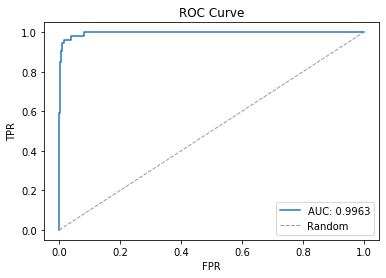

In [21]:
roc =roc_curve(y_prep_test, best_pred_test[:, 1])

label = 'AUC: {:.4}'.format(auc(roc[0], roc[1]))
plt.plot(roc[0], roc[1], label = label)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray',label='Random', alpha=.8)
plt.legend()
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [22]:
precision, recall, _ = precision_recall_curve(y_prep_test, best_pred_test[:, 1])

Text(0, 0.5, 'recall')

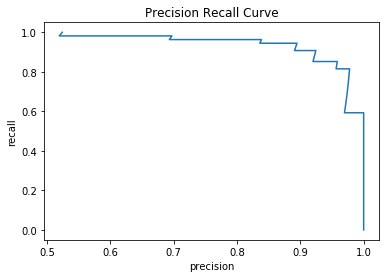

In [25]:
plt.plot(precision, recall)
plt.title("Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")